## Linear Regression (Simple Regression)


Kolay bir yöntem, bizim bir fonksiyonumuz var ve bu fonksiyonu tahmin etmeye çalışıyoruz.

**Assumption**: Aradığımız f doğrusal bir fonksiyondur.


Y = f(X) + e ~> # Y_hat = f_hat(x)

Y ~= f_hat(X)

Çıktımız (Y) ve gidimiz (X) bunların arasındaki ilişkinin doğrusal olduğunu düşünüyoruz.

Girdimize ß1(coefficient gibi bir katsayı ile çarpıp ß0(intercept) ekliyoruz.
 



Y = ß_0 + ß_1 * X

house_price = ß_0 + ß1 * X


**Multiple Regression** da olabilirdi, birden fazla değişkene bağlı olabilir çıktımız.

Y ~= ß0 + ß1+ß1X1+ß2X2+.....+ßnXn

house_price = ß0 + ß1*number_of_room + ß2 * location_id + ß3 * square_meters + .... + Bn * feature_n

girdi ve çıktılar skaler.

y_hat = ß0 + ß1 * x

B0 (kesim noktası - intercept) ve B1 (eğim - slope) nasıl bulabiliriz ?

## Training Set

training_set = {(xi, yi) : 1, ..., n}

training_set nedir ? : Bazı x değerleri var ve bunlara karşılık y değerleri var. Eğer biz iyi bir tahmin yapabildiysek doğrusal bir ilişki kabul ederek iyi bir ilişki bulduysak bizim hesapladığımız y_hat lerin gerçek y lere yakın olmasını beklenir.


## Loss
Loss ' u nasıl ölçeriz?

yi ~= B0 + B1 * Xi, i=1,...,n

y_hat_i = (B0 + B1 * Xi)

e_i = (y_i - y_hat_i)              # residual (kalıntı - ith residual)


Bir tanesi için residual bu şekilde fakat bizde bir training_set boyunca hesaplanması gereken residual var.

Hepsi için

RSS = e1^2 + e2^2 + e3^2 ... + en^2

### Residual Sum of Squares

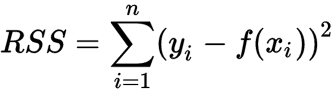

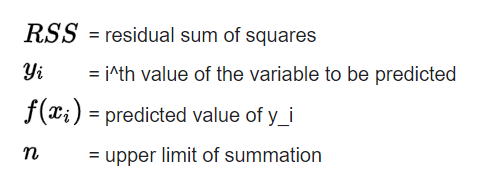

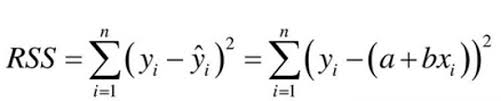

Residuals nasıl görünüyor?
Gerçek verinin bu çizgiye olan uzaklığı ile hatayı ölçüyoruz.



Karelerini alıyoruz (magnitude)

Bu kalıntı karelerden kurtulmak istiyoruz en ideal durumda bütün noktalar bir doğru üzerinde olsaydı bizim beklentimiz olan doğrusal bir ilişkiyi tamamen karşılardı ve modelimiz çok doğru olurdu.

Kalıntı kareleri mümkün olduğunca küçük tutmayı isteyebiliriz.
Yani bu eğitim verisine oturtabileceğimiz (fit) sonsuz sayıda doğru var ancak bir sadece bir tanesini seçmek istiyoruz.

Temel mantık - mümkün olduğunca bütün bu eğitim verisindeki noktalara yakın geçecek, hata paylarını az tutacak bir doğru bulmak.

## Least Squares Method

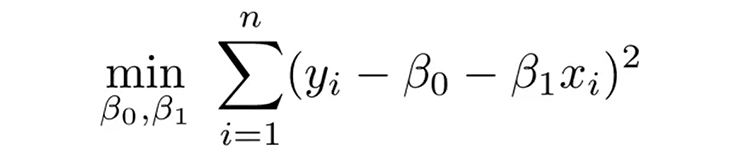

En uygun B0 ve B1 değerini bulacak bir optimizasyon problemi çözüyoruz.
İki bilinmeyeni var be dış bükey bir fn.

Temelde çözeceğim fonksiyonun bir tane minimum noktası olduğunu biliyorsam, tek yapacağım şey verilen fonksiyonun türevini almak b0 ve b1 e göre ve 0 a eşitlemem yetecek.


minimization of LSE khanacademy - https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/proof-part-1-minimizing-squared-error-to-regression-line



In [65]:
#example

In [66]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error

In [67]:
data = pd.read_csv('./data/USA_Housing.csv')

In [68]:
data.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [69]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [70]:
feature=data.drop(['Price','Address'],axis=1).values
target =data['Price'].values

In [71]:
feature

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04]])

In [72]:
# train test split
train, test, train_label, test_label = train_test_split(feature,target,test_size=0.3,random_state=222)

In [73]:
# model
reg=LinearRegression(fit_intercept=True)

# best fit
model = reg.fit(train,train_label)

# test
predict = model.predict(test)

In [75]:
r"""
r2 score is coefficient of determination
it assesses the goodness-of-fit of a linear regression model, on scale from [0,1]
prediction : proportional reduction in model prediction error
explanation : proportion of variance in response variable explained by explanatory variables

how much variation in y does x explain ?
or
how much does including x reduce our error in prediction y ?
"""

print(r2_score(test_label,predict))

0.9128330751213811
